# Assemble Results for Genotype Evolution Trend Related Plots

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# And load in py files
%cd 'drive/My Drive/BoniLabMDRPaper'
%pwd

/content/drive/My Drive/BoniLabMDRPaper


'/content/drive/My Drive/BoniLabMDRPaper'

In [0]:
from plot_helper import parse

# Define Filepath and Preliminary Parse
filepath = 'data/monthly_mft_2.txt'
df = parse(filepath)
if (df is None):
    raise RuntimeError("Not a single-location'd file.")

## 1. Blood Slide Prevalence Plot

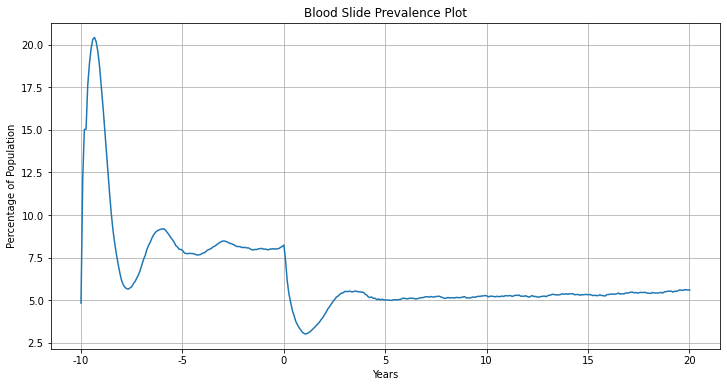

In [4]:
from plotter import bsp_plot
bsp_plot(df)

## 2. Genotype Evolution Trend Plots

In [0]:
# User Defined Variables
# Required for this plot

# 1 for drug-mutation_event indicator
# 2 for drug efficacy
option = 2
totaldrugname = ['DHA-PPQ','AS-AQ','AL']
strategy = 'Cycling'

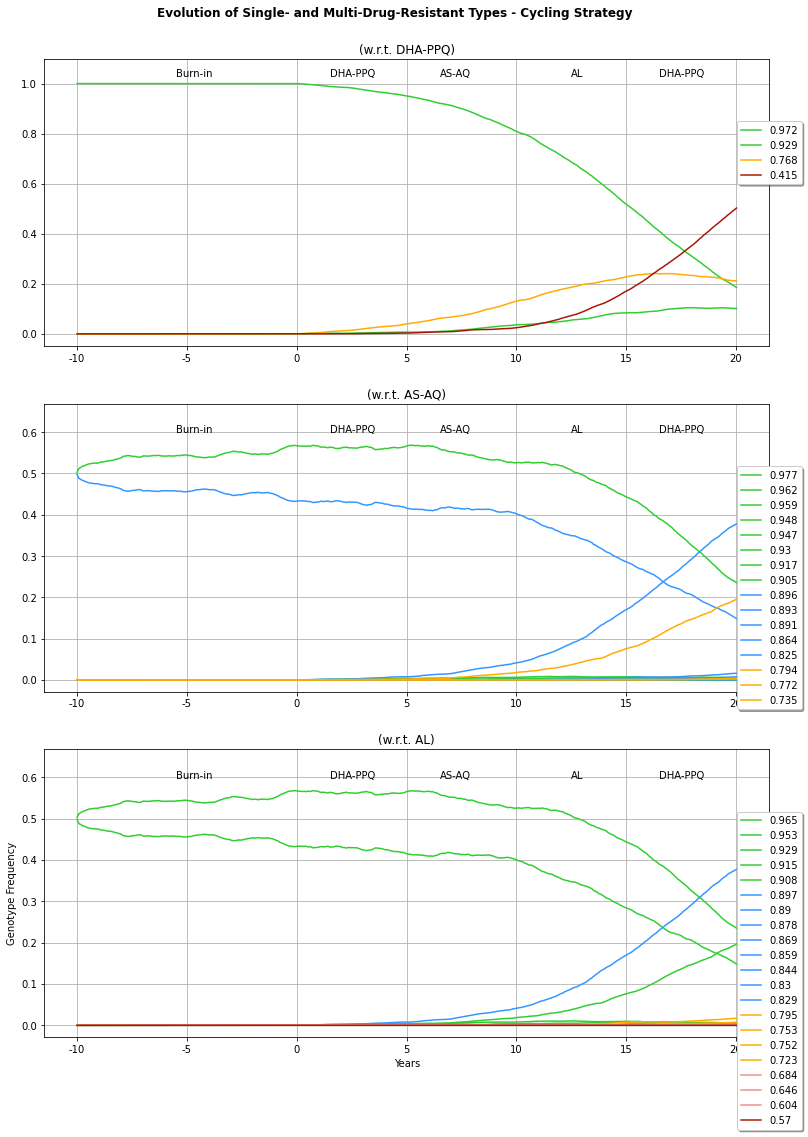

In [7]:
from plot_helper import df_col_replace
from plotter import mdr_get_plot

df_list= list()
if option != 1 and option != 2:
    raise RuntimeError("Plot option not found.")

# Iterate through each drugset (associated with thearpy)
for therapydrugset in totaldrugname:       
    # Error Handlings
    if therapydrugset not in ['AL','AS-AQ','DHA-PPQ','AS-MQ']:
        raise RuntimeError("ACT drug not found.")
    if 'AL' in therapydrugset and 'AS-AQ' in therapydrugset:
        raise RuntimeError("Impossible to analyze both LM and AQ together.")
    # Analyze MDR cases and further process the dataframe
    mdr_parsed_df = df_col_replace(df, therapydrugset, option=option)
    df_list.append(mdr_parsed_df)

# Plot, in subpanels, parasite count by case plot
mdr_get_plot(df_list=df_list, totaldrugname=totaldrugname, strategy=strategy, option=option, plot_h=6)

## 3. Most Dangerous Triple-Resistant Genotype Evolution Trend Plot

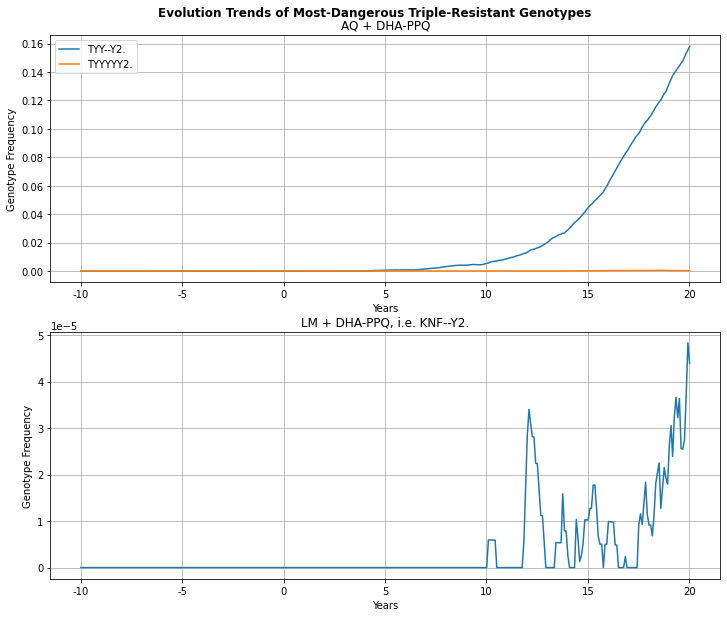

In [8]:
from plotter import mdtrg_plot
mdtrg_plot(df)

## 4. Plot Area-Under-Curve to show Genotype Risk

In [0]:
# User Defined Variables
# Required for this plot

startyear = 15
endyear = 20
genopattern='TYY..Y2.'

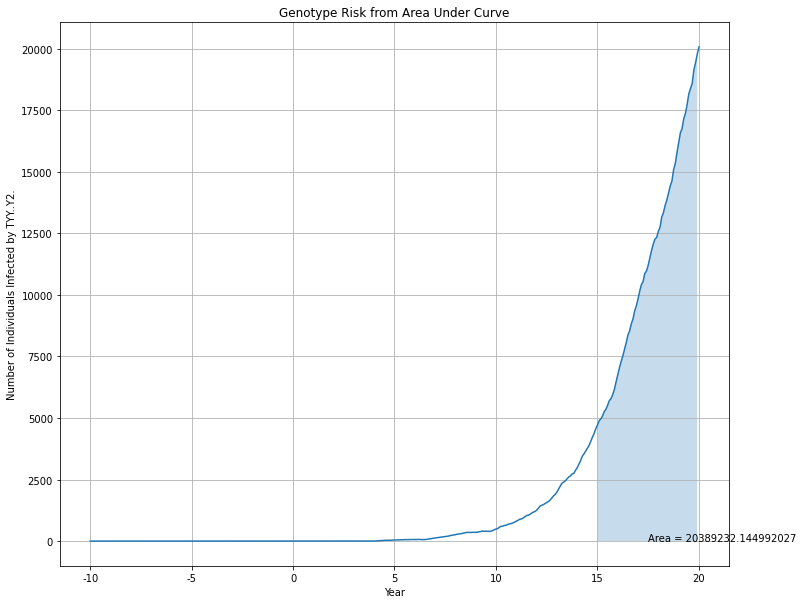

In [11]:
from plotter import risk_auc_plot
risk_auc_plot(df, startyear=startyear, endyear=endyear, genopattern=genopattern)